In [22]:
#viscous_equilibrium.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 16 March 2018.
#plot librating ringlet

In [23]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'fast_gravity = ', fast_gravity
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()

r.shape =  (1201, 2, 241)
total_ring_mass =  3e-09
shear_viscosity =  1e-10
bulk_viscosity =  1e-10
initial_orbits =  {'w_prime': 0.0017364706610736146, 'shape': 'eccentric', 'e': 0.005, 'e_prime': 0.09127506005649112}
fast_gravity =  False
e.min() =  nan
e.max() =  nan


helper_fns.py:29: RuntimeWarning: invalid value encountered in greater
  idx = angle > np.pi
helper_fns.py:31: RuntimeWarning: invalid value encountered in less
  idx = angle < -np.pi


In [24]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*shear_viscosity)
viscous_timescale = np.abs(viscous_timescale)
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale

viscous_timescale =  833.3333333333333


In [25]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [26]:
#calculate differences da, de, dwt between outer & inner streamline's periapse
from libration import *
a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = orbit_deltas(times, r, a, e, wt)

libration.py:56: RuntimeWarning: invalid value encountered in greater
  idx = (dwt > np.pi)
libration.py:58: RuntimeWarning: invalid value encountered in less
  idx = (dwt < -np.pi)


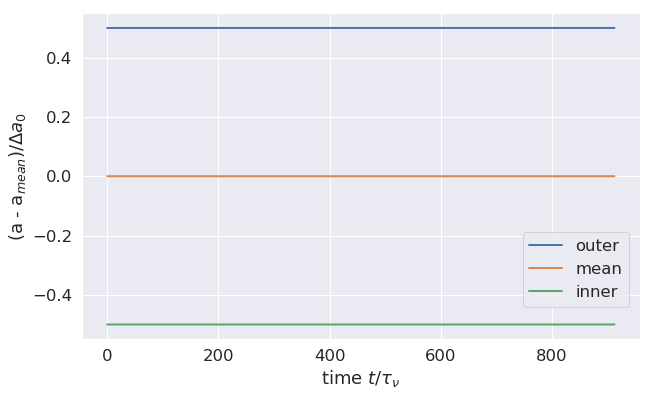

In [27]:
#plot streamline's mutual a-evolution
da_init = da[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (a_outer - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='outer')
y = (a_mean - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='mean')
y = (a_inner - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('(a - a$_{mean})/\Delta a_0$')
p = ax.legend(loc=(0.79, 0.1))

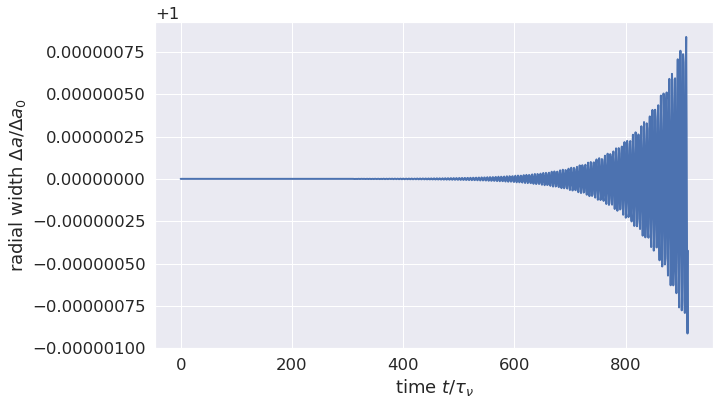

In [28]:
#plot delta_a versus time
x = times_viscous
y = da/da_init
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

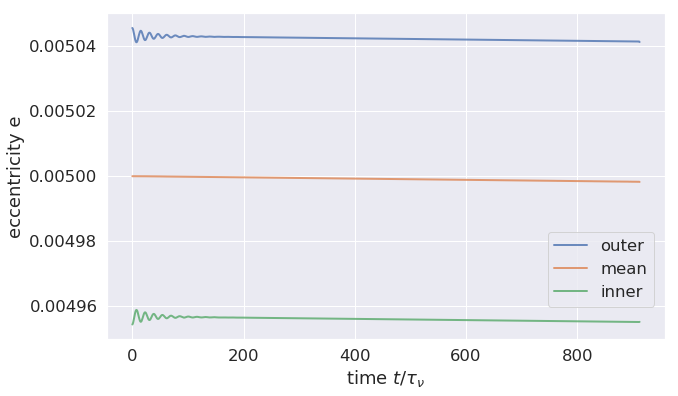

In [29]:
#plot streamline's e-evolution
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_mean
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='mean')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.legend(loc=(0.79, 0.1))

In [30]:
#equilibrium dwt and de
idx = (times_viscous > 250) & (times_viscous < 600)
dwt_eq = np.median(dwt[idx])
print 'dwt_eq = ', dwt_eq
de_eq = np.median(de[idx])
print 'de_eq = ', de_eq

dwt_eq =  0.0002930970328408611
de_eq =  8.632597420371807e-05


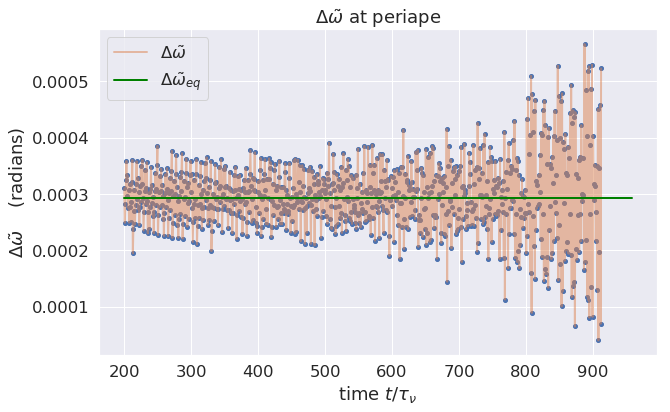

In [34]:
#plot dwt versus time
x = times_viscous
y = dwt
idx = (x > 200)
x = x[idx]
y = y[idx]
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none', label='')
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.5, label=r'$\Delta\tilde{\omega}$')
y = x*0 + dwt_eq
p = ax.plot(x, y, linestyle='-', linewidth=2, color='green', label=r'$\Delta\tilde{\omega}_{eq}$')
p = ax.set_title(r'$\Delta\tilde{\omega}$ at periape')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')
p = plt.legend()

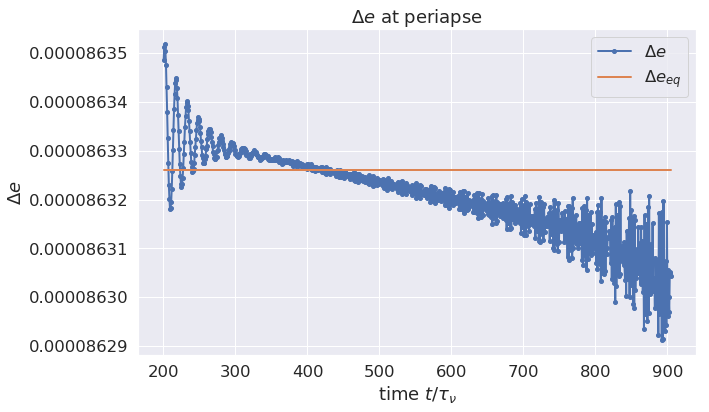

In [37]:
#plot delta_e versus time
x = times_viscous
y = de
idx = (x > 200) & (x < 905)
x = x[idx]
y = y[idx]
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=2, label=r'$\Delta e$')
y = x*0 + de_eq
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e_{eq}$')
p = ax.set_title(r'$\Delta e$ at periapse')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta e$')
p = plt.legend()

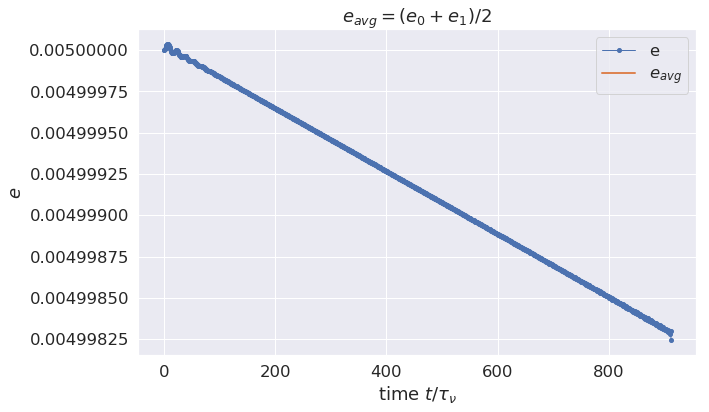

In [38]:
#plot e_avg versus time
x = times_viscous
y = e_mean
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=1, label='e')
e_avg = e_mean.mean()
y = x*0 + e_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$e_{avg}$')
p = ax.set_title(r'$e_{avg} = (e_0+e_1)/2$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$e$')
p = plt.legend()

In [39]:
#compute e_prime, wt_prime, q to lowest order, and H(q)
H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
H_avg = H[idx].mean()

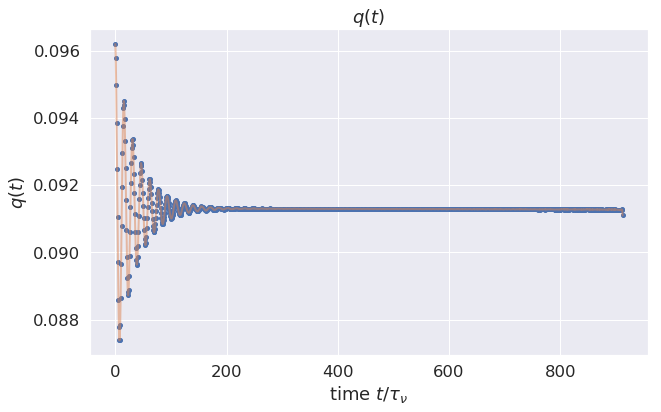

In [40]:
#plot q versus time
x = times_viscous
y = q
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none')
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=2)
p = ax.set_title(r'$q(t)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$q(t)$')

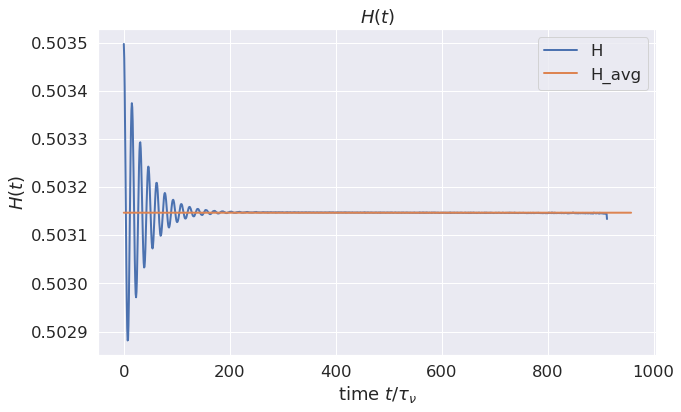

In [41]:
#plot H(q2) versus time
x = times_viscous
y = H
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label='H')
y = x*0 + H_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, label='H_avg')
p = ax.set_title(r'$H(t)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$H(t)$')
p = plt.legend()

In [42]:
#integral of motion from BGT
Ix = (de - de_eq)*a_mean/da
Iy = e_mean*a_mean*(dwt - dwt_eq)/da
I = np.sqrt(Ix**2 + Iy**2)
I_avg = I[idx].mean()
print 'I_avg = ', I_avg

I_avg =  0.00023402696921679547


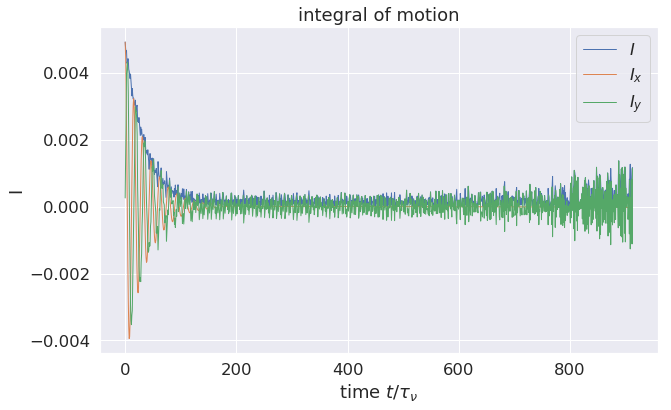

In [43]:
#plot I versus time
x = times_viscous
y = I
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1, label=r'$I$')
p = ax.plot(x, Ix, linestyle='-', linewidth=1, label=r'$I_x$')
p = ax.plot(x, Iy, linestyle='-', linewidth=1, label=r'$I_y$')
p = ax.set_title(r'integral of motion')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('I')
#p = ax.set_ylim(-5*I_avg, 5*I_avg)
p = plt.legend()

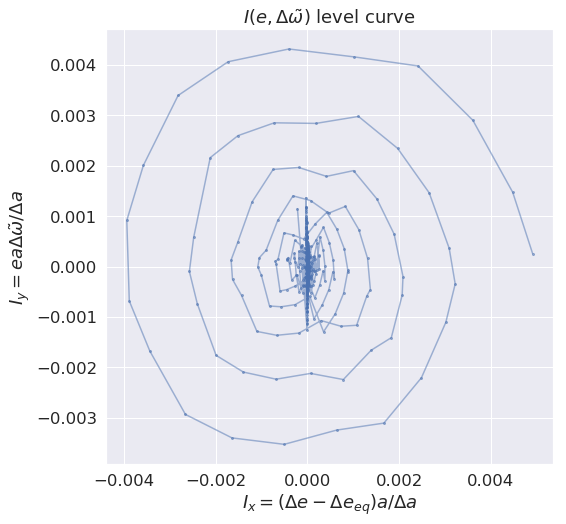

In [44]:
#plot (Ix, Iy)
f, ax = plt.subplots(figsize=(8, 8))
p = ax.set_title(r'$I(e, \Delta\tilde{\omega})$ level curve')
p = ax.set_xlabel(r'$I_x = (\Delta e - \Delta e_{eq})a/\Delta a$')
p = ax.set_ylabel(r'$I_y = ea\Delta\tilde{\omega}/\Delta a$')
x = Ix
y = Iy
p = ax.plot(x, y, marker='o', markersize=2, linestyle='-', alpha=0.5)

In [46]:
for idx, time in enumerate(times_viscous):
    rt = r[idx]
    if (np.isnan(rt).sum() > 0):
        break
print idx

1144


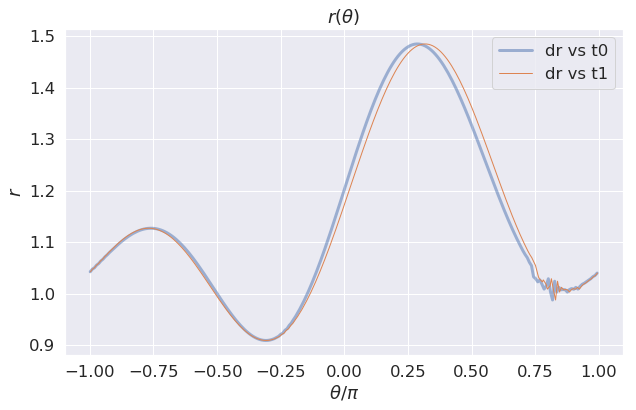

In [47]:
#inspect ringlet's final shape
tidx = len(times) - 1
tidx = 1143
rt = r[tidx]
t0 = t[tidx][0]
t1 = t[tidx][1]
da = a[tidx][1].mean() - a[tidx][0].mean()
dr = (r[tidx][1] - r[tidx][0])/da
x = t0/np.pi
y = dr
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=3, alpha=0.5, label='dr vs t0')
x = t1/np.pi
p = ax.plot(x, y, linestyle='-', linewidth=1, label='dr vs t1')
p = ax.set_title(r'$r(\theta)$')
p = ax.set_xlabel(r'$\theta/\pi$')
p = ax.set_ylabel(r'$r$')
p = plt.legend()

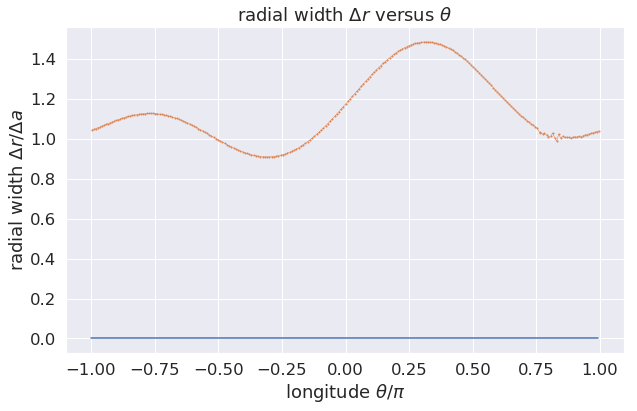

In [48]:
#inspect final radial width versus longitude
rt = r[tidx]
r0 = rt[0]
r1 = rt[1] - r0
r0 = r0 - r0
at = a[tidx]
a0 = at[0]
a1 = at[1]
da = a1.mean() - a0.mean()
tt = t[tidx]
t0 = tt[0]
t1 = tt[1]
f, ax = plt.subplots(figsize=(10, 6))
x = t0/np.pi
y = r0/da
p = ax.plot(x, y, linestyle='-')
x = t1/np.pi
y = r1/da
p = ax.plot(x, y, linestyle='-', linewidth=0.5, marker='.', markersize=2)
p = ax.set_title(r'radial width $\Delta r$ versus $\theta$')
p = ax.set_xlabel(r'longitude $\theta/\pi$')
p = ax.set_ylabel(r'radial width $\Delta r/\Delta a$')

In [49]:
#estimated e_prime and wt_prime at the equilibrium fixed point
print 'e_prime = ', e_prime[idx].mean()
print 'wt_prime = ', wt_prime[idx].mean()

e_prime =  nan
wt_prime =  nan
